In [1]:

import warnings

# Suppress the warning
warnings.filterwarnings("ignore", category=Warning)

In [5]:
###2. create non-reduced dataset - fill in 1s for none values in the index column (and also average for other demo columns)
from functions.N_fctn_load_excel import load_excel_to_dataframe
daf = load_excel_to_dataframe('MAIN_DATA.xlsx')

In [6]:

from functions.Q_fction_get_summary_statistics import get_summary_statistics

summary1 = get_summary_statistics(daf)
print(summary1)

                                           count  unique                mode  \
profile                                     7728    7728               Detek   
link                                        7728       2                 0.0   
experience                                  7728    1110                 0.0   
contributions                               7728     114                 0.0   
comments                                    7728     741                 0.0   
artifacts                                   7728     295                 1.0   
coins                                       7728     180                 0.0   
residence_additional_info                   7728       2                 0.0   
municipality                                4230     899               Praha   
municipal_office                            4216     355  Hlavní město Praha   
real_net_monetary_index                     4216     355            1.131666   
submitted_number_artifs                 

In [8]:
from functions.Q_fction_get_summary_statistics import get_extended_summary_statistics

summary1_ext = get_extended_summary_statistics(daf)
print(summary1_ext)

                                            count    mean      std    min  \
link                                       7728.0    0.03     0.16   0.00   
experience                                 7728.0  833.84  8855.30   0.00   
contributions                              7728.0    2.69    22.45   0.00   
comments                                   7728.0  147.39   839.08   0.00   
artifacts                                  7728.0   20.79    72.76   0.00   
coins                                      7728.0    9.72    27.72   0.00   
residence_additional_info                  7728.0    0.01     0.10   0.00   
real_net_monetary_index                    4216.0    1.00     0.07   0.77   
submitted_number_artifs                    6677.0    0.48     3.56   0.00   
number_artifs                              6677.0   24.01    77.78   1.00   
artifs_rate                                6677.0    0.01     0.08   0.00   
submitted_number_coins                     5323.0    0.08     0.97   0.00   

In [27]:
#we fill-in the values...:
from functions.P_fctn_fill_missing_values import fill_missing_values

daf_non_reduced = fill_missing_values(daf,{'real_net_monetary_index':1, 
                                           'average_age':42.4734915211329, 
                                           'men_proportion':0.497149745062897, 
                                           '65+_proportion':0.197914581620951, 
                                           'localities_rate': 0.021478453745227236, 
                                           'population_density': 135, 
                                           'area_municipality':12.603110956375838     })
daf_non_reduced = fill_missing_values(daf_non_reduced, {'artifs_rate':0, 'coins_rate':0, 'rate_artifs_dummy':0, 'rate_coins_dummy':0}) 
#print(daf_non_reduced)

from functions.R_fctn_subset_dataframe import subset_dataframe
from functions.N_fctn_subset_non_none import subset_non_none_values
from functions.B_fctn_drop_columns import drop_columns
daf_non_reduced_with_none_being_zero = daf_non_reduced.copy()
daf_non_reduced_with_none_being_zero = drop_columns(daf_non_reduced_with_none_being_zero, ['number_artifs','submitted_number_artifs', 'number_coins', 'submitted_number_coins'],)


daf_non_reduced_with_none_being_zero = subset_dataframe(daf_non_reduced_with_none_being_zero, 'uploaded_at_least_one_artif_or_coin_dummy') #DATASET 1., we have a considerable 7622 rows


#print(daf_non_reduced_with_none_being_zero)

daf_non_reduced_copy_2 = daf_non_reduced.copy()
daf_non_reduced_copy_3 = daf_non_reduced.copy()



#daf_non_reduced_with_artif_none_deleted = subset_non_none_values(daf_non_reduced_copy_2, 'number_artifs') #using 'number_artifs' since artifs rate is imprecise---includes 0s even if one have 0 artifacts sometimess, the same for coins:
daf_non_reduced_with_coin_none_deleted = subset_non_none_values(daf_non_reduced_copy_3, 'number_coins') ####DATASET 2.


In [15]:

from functions.F_fctn_save_df_to_excel import save_dataframe_to_excel

save_dataframe_to_excel(daf_non_reduced_with_coin_none_deleted, 'df_nonreduced_coins.xlsx')


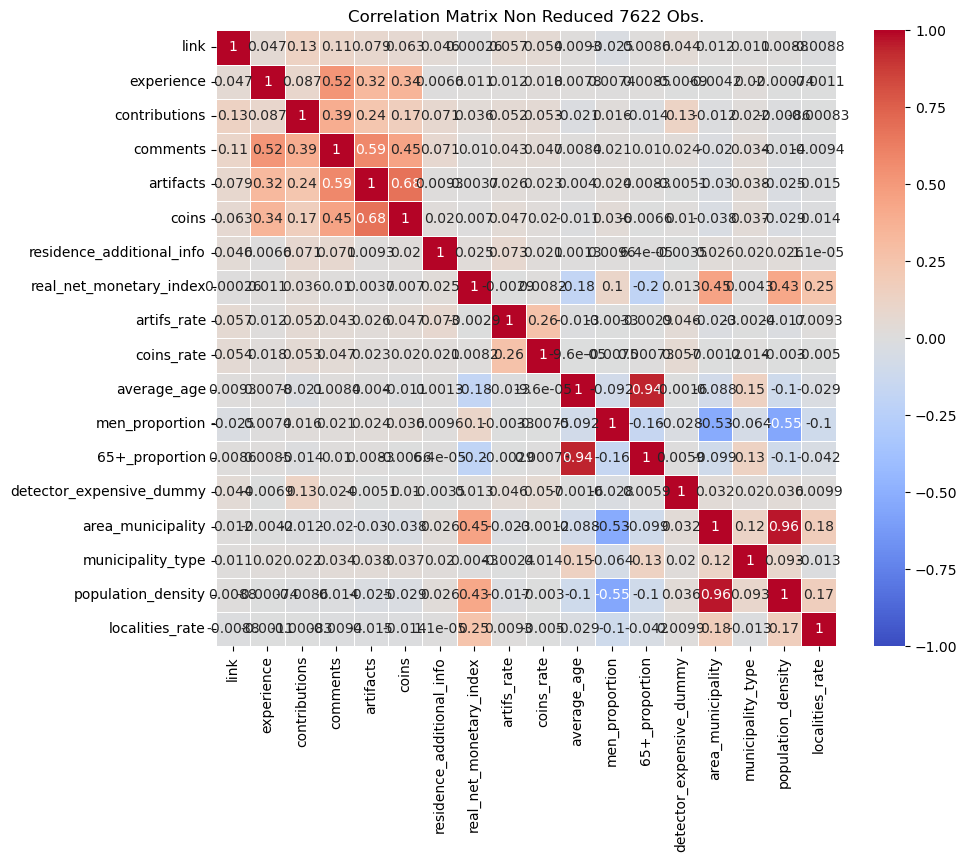

In [29]:
#1. ! correlation matrix:
from functions.Q_fctn_create_correlation_matrix import create_correlation_matrix



create_correlation_matrix(daf_non_reduced_with_none_being_zero,['link',                                        
'experience',                                  
'contributions',                               
'comments',                                    
'artifacts',                                   
'coins',                                       
'residence_additional_info','real_net_monetary_index',                     
'artifs_rate',                                 
'coins_rate',                                  
'average_age',   
'men_proportion',                              
'65+_proportion',                              
'detector_expensive_dummy',                    
'area_municipality',                           
'municipality_type',                           
'population_density',                         
'localities_rate'],'Correlation Matrix Non Reduced 7622 Obs.')



In [25]:

#from the correlation matrix we chose 10 variables with the strongest correlation to rates and that are subject to the main hypothesis:

daf_non_reduced_with_none_being_zero = drop_columns(daf_non_reduced_with_none_being_zero, ['area_municipality',                           
'municipality_type',                           
'population_density',
'average_age',                            
'uploaded_at_least_one_artif_or_coin_dummy',   
'men_proportion',                              
'65+_proportion'])
